מגישות:
נועה פרומקיס,
נועה זילברשטיין,
חן אופיר גולן
ושיר טבת 

הנתונים לקחו מאתר קאגל:https://www.kaggle.com/andrewmvd/data-engineer-jobs

הורדה וייבוא של כל הספריות שבהם נשתמש במהלך הקובץ

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from os import path
from PIL import Image


In [43]:
data = 'https://raw.githubusercontent.com/shirtevet/project_Data-Engineer-Jobs/main/DataEngineer.csv'
Data_Engineer= pd.read_csv(data)

Data_Engineer

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1


הצגת הנתונים בטבלה

In [44]:
Data_Engineer.shape

(2528, 15)

In [45]:
Data_Engineer["Job Title"].value_counts()

Data Engineer                                          469
Senior Data Engineer                                   103
Software Engineer                                       93
Big Data Engineer                                       73
Sr. Data Engineer                                       35
                                                      ... 
Graduate Engineer - Land                                 1
Data Center Hardware Engineer I                          1
Tier II TAC Engineer                                     1
IT Support Engineer I                                    1
Future Opportunities: Software Development Engineer      1
Name: Job Title, Length: 1260, dtype: int64

In [46]:
Data_Engineer.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

בקובץ מופיע הערך חסר כ"1-" ולכן שינינו את כל הווריציות של ערכים אלה לנאן    

In [47]:
Data_Engineer.replace(['-1'], [np.nan], inplace=True)
Data_Engineer.replace(['-1.0'], [np.nan], inplace=True)
Data_Engineer.replace([-1], [np.nan], inplace=True)
Data_Engineer

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009.0,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",NaN
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998.0,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),NaN,NaN
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003.0,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),NaN,NaN
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,NaN
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914.0,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),NaN,NaN
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993.0,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),NaN,NaN
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,NaN,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,NaN,Company - Public,NaN,NaN,Unknown / Non-Applicable,NaN,NaN


בדיקה שאכן מילאנו את הערכים החסרים 

In [48]:
Data_Engineer.isnull().sum()

Job Title               0
Salary Estimate         0
Job Description         0
Rating                234
Company Name            0
Location                0
Headquarters          124
Size                  119
Founded               571
Type of ownership     119
Industry              378
Sector                375
Revenue               119
Competitors          1749
Easy Apply           2382
dtype: int64

טיפול בערכים חסרים

טיפול בערכים חסרים:
את הערכים החסרים בעמודת הדירוג- מילאנו בממוצע הדירוגים (כך שזה לא ישפיע על הממוצע הכללי)

את הערכים החסרים בעמודת מיקום ההנהלה של החברה- מילאנו במיקום החברה (מתוך היגיון)



In [49]:
Data_Engineer["Rating"].fillna(Data_Engineer["Rating"].mean() , inplace=True)
Data_Engineer["Headquarters"].fillna(Data_Engineer["Location"] , inplace=True)
Data_Engineer

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009.0,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",NaN
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998.0,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),NaN,NaN
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003.0,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),NaN,NaN
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,NaN
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914.0,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),NaN,NaN
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993.0,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),NaN,NaN
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,NaN,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,NaN,Company - Public,NaN,NaN,Unknown / Non-Applicable,NaN,NaN


טיפול במשכורת:
הורדת המלל המיותר בכדי שנוכל להשתמש במספרי המשכורות בלבד

In [50]:

Data_Engineer['Salary Estimate'] = Data_Engineer['Salary Estimate'].str.replace('(','').str.replace(')','').str.replace('Glassdoor est.','').str.replace('Employer est.','')


C:\Users\shirt\AppData\Local\Temp/ipykernel_7628/1917746631.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Data_Engineer['Salary Estimate'] = Data_Engineer['Salary Estimate'].str.replace('(','').str.replace(')','').str.replace('Glassdoor est.','').str.replace('Employer est.','')
C:\Users\shirt\AppData\Local\Temp/ipykernel_7628/1917746631.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Data_Engineer['Salary Estimate'] = Data_Engineer['Salary Estimate'].str.replace('(','').str.replace(')','').str.replace('Glassdoor est.','').str.replace('Employer est.','')


הוספת 2 עמודות חדשות, במקום עמודת הטווח של המשכורת. עמודה לכל קצה טווח- אחד למינימום ואחד למקסימום (כאשר מה שמפריד בין הערכים זה "-")
בנוסף, הורדת רווחים וסימנים כדי שנוכל להשתמש במספרים לחישובים.

In [51]:
Data_Engineer['Minimom Salary'],Data_Engineer['Maximom Salary'] = Data_Engineer['Salary Estimate'].str.split('-').str
Data_Engineer['Minimom Salary'] = Data_Engineer['Minimom Salary'].str.strip(' ').str.strip('$').str.strip('K').fillna(0).astype(int)
Data_Engineer['Maximom Salary'] = Data_Engineer['Maximom Salary'].str.strip(' ').str.strip('$').str.strip('K').fillna(0).astype(int)
Data_Engineer

C:\Users\shirt\AppData\Local\Temp/ipykernel_7628/3495966253.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Data_Engineer['Minimom Salary'],Data_Engineer['Maximom Salary'] = Data_Engineer['Salary Estimate'].str.split('-').str


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Minimom Salary,Maximom Salary
0,Data Engineer,$80K-$150K,Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009.0,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",NaN,80,150
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K,"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998.0,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),NaN,NaN,80,150
2,Data Engineers,$80K-$150K,Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003.0,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),NaN,NaN,80,150
3,Client Trade Support Engineer,$80K-$150K,About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,NaN,80,150
4,Data Engineer,$80K-$150K,Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914.0,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",TRUE,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K,The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),NaN,NaN,76,128
2524,Electrical Engineer,$76K-$128K,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993.0,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),NaN,NaN,76,128
2525,Sr. Big Data Engineer,$76K-$128K,Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,NaN,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,76,128
2526,Senior Big Data / ETL Engineer,$76K-$128K,"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,NaN,Company - Public,NaN,NaN,Unknown / Non-Applicable,NaN,NaN,76,128


<font size="5"> תובנה ראשונה  </font>


מיינו את כל העבודות על פי הכנסת החברה.
הדפסנו היסטוגרמה וגרף נקודות של רווח החברה ולמולו המשכורת של העובד
התובנה היא כי ניתן לראות שלא בהכרח ישנה משכורת גבוהה יותר בחברה רווחית יותר

[Text(0, 0.5, ''), Text(0.5, 0, 'Salary in k($)')]

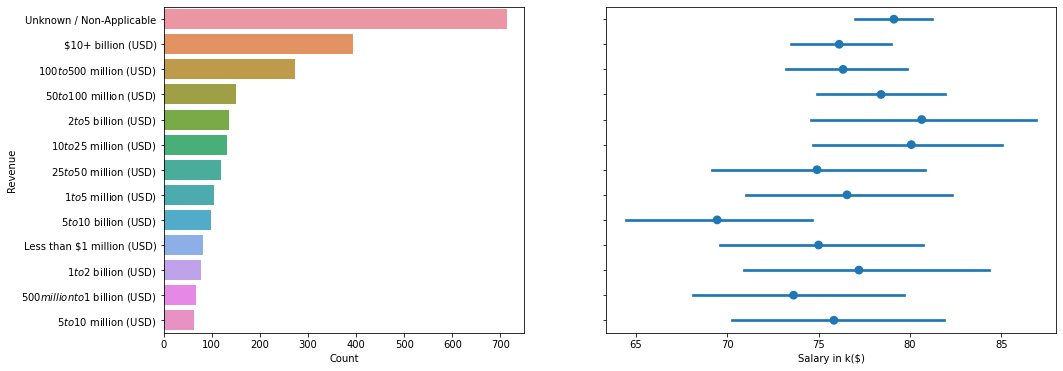

In [52]:
count_rev = Data_Engineer.groupby('Revenue')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values('Count', ascending=False).reset_index(drop=True)
count_rev = count_rev.merge(Data_Engineer, on='Revenue',how='left')
#sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.8,1)},figsize=(16,6))
sns.barplot(x='Count',y='Revenue',data=count_rev ,ax=ax_bar)
sns.pointplot(x='Minimom Salary',y='Revenue',data=count_rev , join=False,ax=ax_point).set(ylabel="",xlabel="Salary in k($)")


<font size="5"> תובנה שנייה  </font>

המשך סידור העמודות והצגת פרטים

הוספת עמודה של משכורת ממוצעת (לפי מינימום ומקסימום חלקי שתיים)

In [53]:
Data_Engineer['Mean_Salary'] = (Data_Engineer['Minimom Salary']+Data_Engineer['Maximom Salary'])/2 
Data_Engineer

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Minimom Salary,Maximom Salary,Mean_Salary
0,Data Engineer,$80K-$150K,Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009.0,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",NaN,80,150,115.0
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K,"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998.0,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),NaN,NaN,80,150,115.0
2,Data Engineers,$80K-$150K,Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003.0,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),NaN,NaN,80,150,115.0
3,Client Trade Support Engineer,$80K-$150K,About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,NaN,NaN,80,150,115.0
4,Data Engineer,$80K-$150K,Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914.0,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",TRUE,80,150,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K,The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,NaN,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),NaN,NaN,76,128,102.0
2524,Electrical Engineer,$76K-$128K,Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993.0,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),NaN,NaN,76,128,102.0
2525,Sr. Big Data Engineer,$76K-$128K,Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,NaN,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),NaN,NaN,76,128,102.0
2526,Senior Big Data / ETL Engineer,$76K-$128K,"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,NaN,Company - Public,NaN,NaN,Unknown / Non-Applicable,NaN,NaN,76,128,102.0


Text(0.5, 1.0, 'boxplot of company rating')

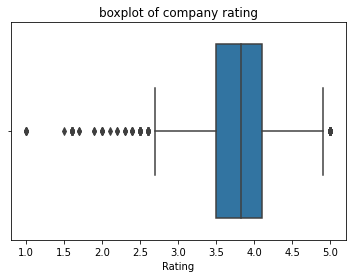

In [54]:
box_rating = sns.boxplot(x=Data_Engineer["Rating"])
box_rating.set_title("boxplot of company rating")

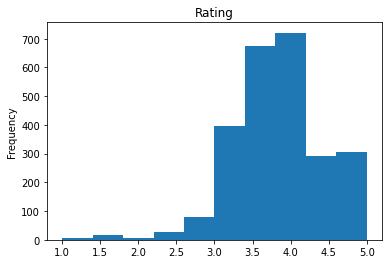

In [55]:
Data_Engineer.Rating.plot(kind='hist')
plt.title('Rating')
plt.grid
plt.show()

הגרפים המוצגים לעיל מראים את התפלגות הדירוג לפי טבלת הנתונים    
לפי גרפים אלו, ניתן לראות כי מירב החברות קיבלו דירוג הנע בין 3.5-4 מתוך טווח של 1-5

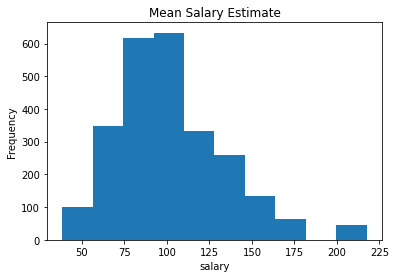

In [56]:
Data_Engineer.Mean_Salary.plot(kind='hist')
plt.title('Mean Salary Estimate')
plt.xlabel('salary')
plt.grid
plt.show()

Text(0.5, 1.0, 'boxplot of mean salary')

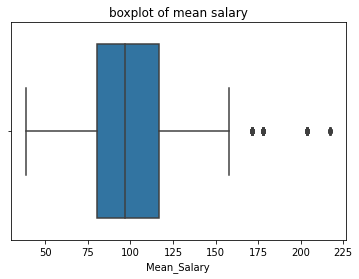

In [57]:
box_salary = sns.boxplot(x=Data_Engineer["Mean_Salary"])
box_salary.set_title("boxplot of mean salary")

הגרפים המוצגים לעיל מראים את התפלגות המשכורת לפי טבלת הנתונים   
על בסיס גרפים אלו ניתן לראות כי השכר הממוצע לעובד נע בין 75-115 דולר

In [58]:
Data_Engineer[['Rating','Mean_Salary']]

,Rating,Mean_Salary
0,4.5,115.0
1,3.4,115.0
2,5.0,115.0
3,4.8,115.0
4,3.7,115.0
...,...,...
2523,4.5,102.0
2524,2.9,102.0
2525,3.7,102.0
2526,3.5,102.0


עמודת דירוג החברה בהשוואה לעמודת השכר הממוצע לעובד

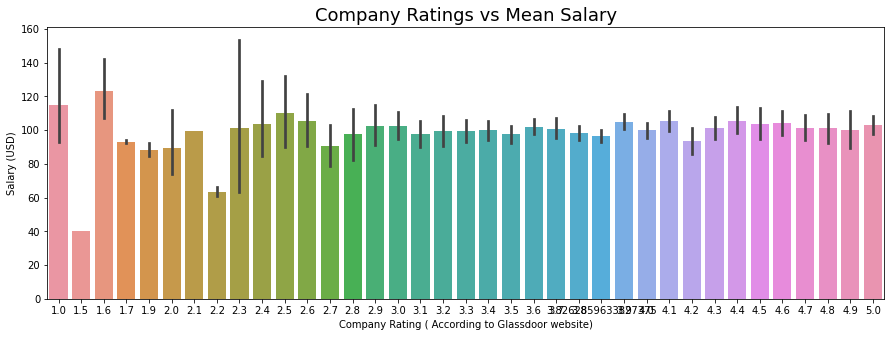

In [59]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x='Rating', y='Mean_Salary', data=Data_Engineer)
plt.ylabel('Salary (USD)')
plt.xlabel('Company Rating ( According to Glassdoor website)')
plt.title('Company Ratings vs Mean Salary',fontsize=18)
plt.show()

הסבר התובנה - כאשר חשבנו על הדירוג אותו קיבלה החברה והשכר של העובד בה, מה שמתבקש הוא להסיק כי ישנו קשר ישיר בין המשתנים. ניתן לחשוב כי השכר של העובד יעלה ככל שהחברה תצליח יותר, כלומר תקבל דירוג גבוה יותר, זאת על בסיס הנטייה לחשוב כי דירוג גבוה מוביל להצלחת החברה, וכי הצלחת החברה מובילה להכנסה גבוהה. הכנסה זו תתחלק בין העובדים ומכאן כי ככל שהדירוג גבוה, הכנסת העובד גבוהה
אמנם, על בסיס ניתוח הנתונים שביצענו במסגרת מחקר על הדאטה בתחומים אלה, ניתן לראות בבירור כי הסקתנו הייתה שגויה.לא קיים קשר בין גובה הדירוג שהחברה קיבלה לבין השכר הממוצע של העובד. לפי הדיאגרמה המראה את הקשר בין הדירוג לשכר, ניכר כי רמת השכר מתפלגת בצורה כמעט אחידה בהשוואה לדירוג החברה. ניתן להבין שבחברה בעלת דירוג נמוך ובחברה בעלת דירוג גבוה, שכר העובד יכול להיות זהה 
בנוסף, ניתן לאשש תובנה זו באמצעות העובד שקיבל בממוצע את השכר הגבוה ביותר, עובד זה נמצא בחברה שקיבלה ציון נמוך מאוד בדירוג, העומד על 1.5 מתוך 5

<font size="5"> תובנה שלישית  </font>

הגרף המוצג מראה את התפלגות התפקידים הנפוצים בשוק העבודה לפי קובץ הנתונים

<AxesSubplot:>

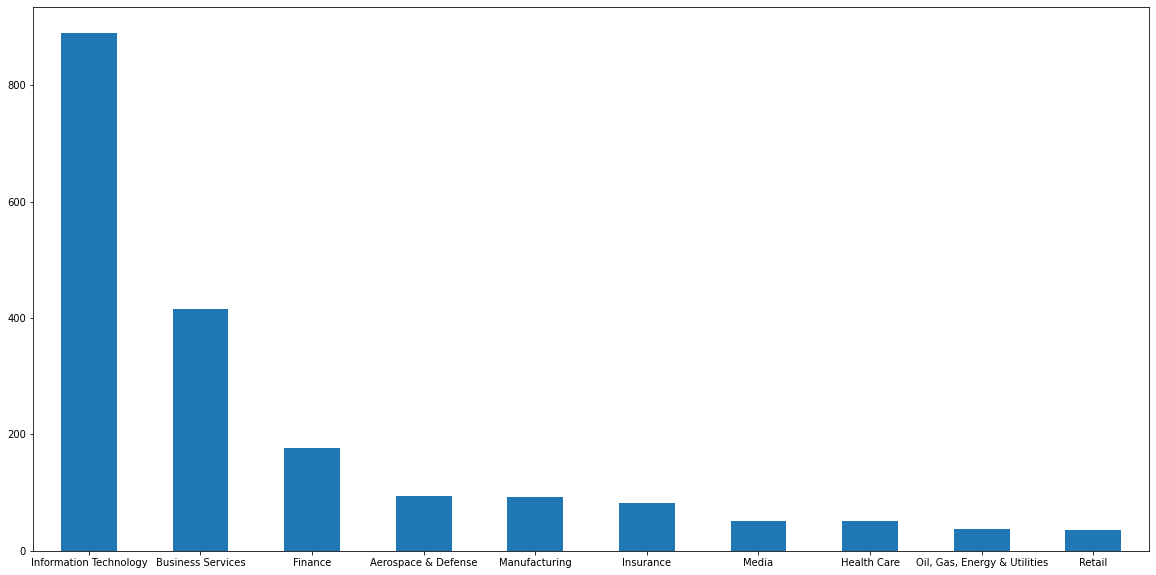

In [60]:
Data_Engineer_sectors = Data_Engineer.Sector.value_counts().sort_values(ascending=False).head(n=10)

axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
Data_Engineer_sectors.plot.bar(x='sectors and industries', y='%', rot=0)

לפי גרף זה ניתן לראות כי התחום בו הביקוש הגבוה ביותר לעובדים הינו תחום טכנולוגיית המידע. לאחריו, מגיע תחום השירותים הפיננסיים

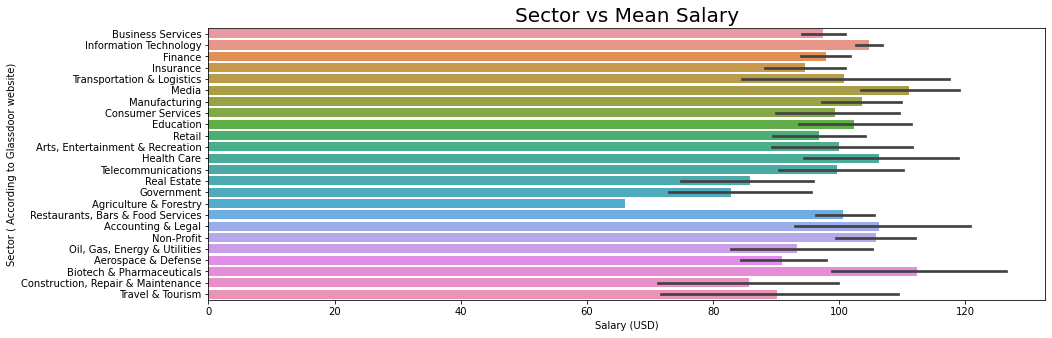

In [61]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x='Mean_Salary', y='Sector', data=Data_Engineer)
plt.ylabel('Sector ( According to Glassdoor website)')
plt.xlabel('Salary (USD)')
plt.title('Sector vs Mean Salary',fontsize=20)
plt.show()

בגרפים המוצגים לעיל ניתן לראות כי אין קשר בין כמות האנשים המועסקים בתחום לבין המשכורת שהם מרוויחים.
לדוגמה, בתחום המדיה מרוויחים העובדים משכורת ממוצעת בין הגבוהות בענף. לעומת זאת, בתחום זה אין היצע גדול של עובדים.
דוגמה נוספת לכך היא שבתחום טכנולוגיית המידע ובתחום השירותים הפיננסיים, כמות העובדים היא הגדולה ביותר ואילו המשכורת בתחומים אלו הינה ממוצעת 